<h1 style="text-align: center;"> Striver - Greedy Algorithms </h1>

# 1. Assign Cookies :

## Problem Statement :

Consider a scenario where a teacher wants to distribute cookies to students, with each student receiving at most one cookie.

<b> Given 2 arrays, student and cookie, the ith value in the Student array describes the Minimum Size of Cookie that the ith student can be assigned. </b> The jth value in the Cookie array represents the size of the jth cookie. If Cookie[j] >= Student[i], the jth cookie can be assigned to the ith student.

<b> Maximize the Number of students assigned with cookies and output the Maximum Number.</b>


### Examples :

**Example 1:**
```
Input : student = [1, 2, 3] , cookie = [1, 1]
Output :1

Explanation :
You have 3 students and 2 cookies.
The Minimum Size of cookies required for students are 1, 2, 3.
You have 2 cookies both of size 1. Hence you can assign the cookie only to the student having Minimum Cookie size 1.
So your answer is 1.
```

**Example 2:**
```
Input : student = [1, 2] , cookie = [1, 2, 3]
Output : 2

Explanation :
You have 2 students and 3 cookies.
The minimum size of cookies required for students are 1 , 2.
You have 3 cookies and their sizes are big enough to assign cookies to all students.
So your answer is 2.
```

```
Constraints:
1 <= student.length <= 3*10^4
0 <= cookie.length <= 3*10^4
1 <= student[i] , cookie[j] <= 2^31 - 1
```

# Optimal Solution

## Intuition

The goal is to Maximize the Number of Students who can be satisfied with the given cookies. <b>By sorting both the students' greed factors and the cookie sizes, we can efficiently assign the smallest available cookie that satisfies each student's greed.</b> We iterate through the arrays, assigning cookies to students until we either run out of students or cookies, ensuring the maximum number of satisfied students.

## Approach

* Sort both the students' greed and cookie sizes to efficiently pair the smallest cookies with the least greedy children.
* Use 2 pointers to iterate through the arrays, representing the smallest available cookie and the least greedy child.
* For each pair, check if the current cookie can satisfy the current child's greed.
* If a child's greed is satisfied, move to the next child; always move to the next cookie.
* The final count of satisfied children indicates the Maximum Number of Children who can be content with the given cookies.

## Dry Run

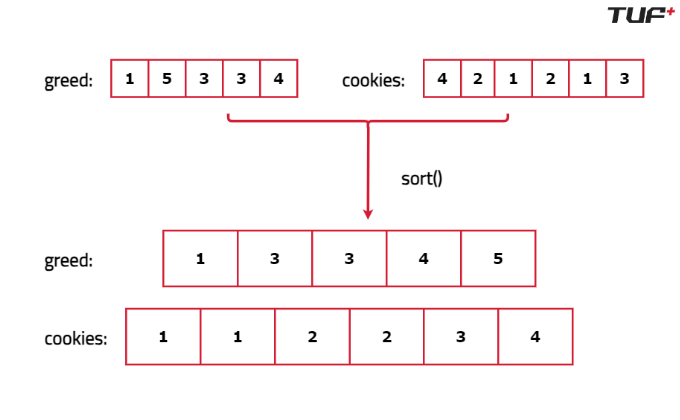
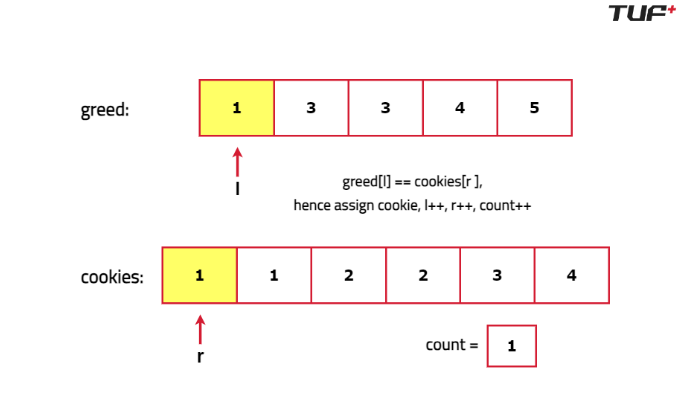
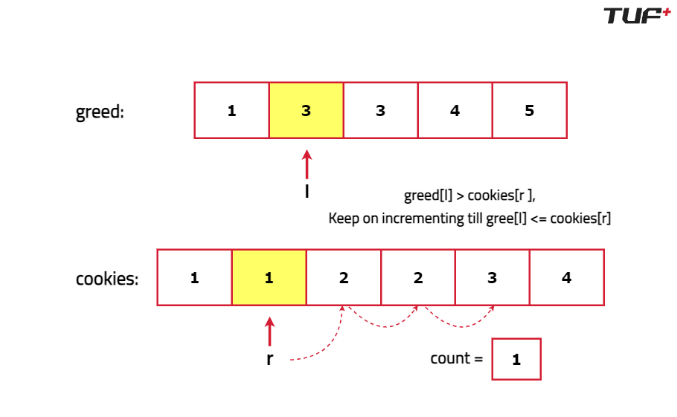
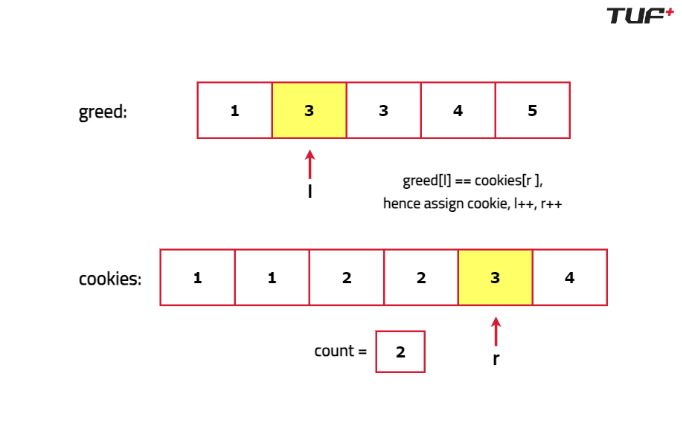
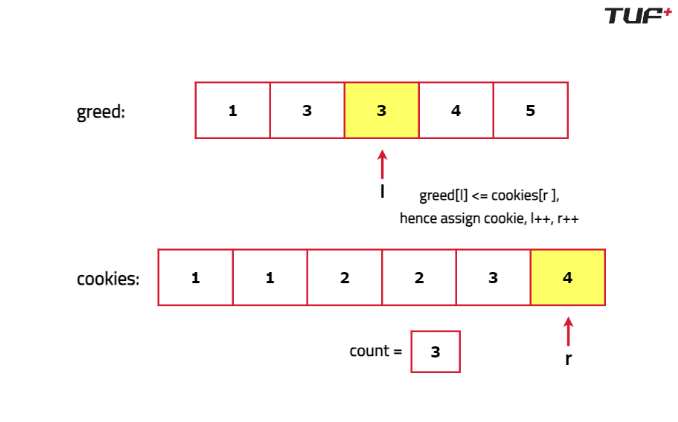
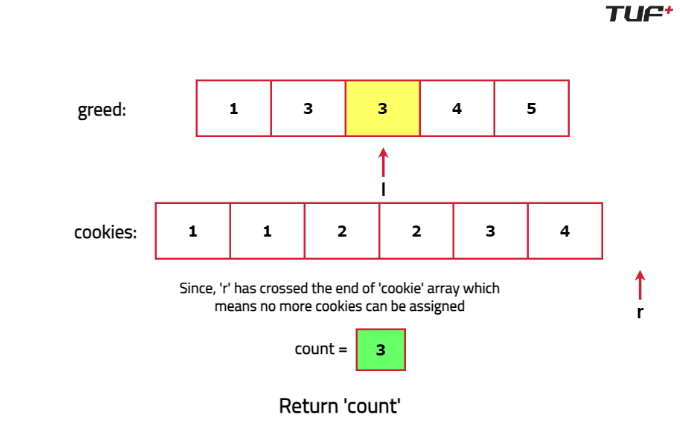

## Optimal Python Solution

In [1]:
class Solution:
    def findMaximumCookieStudents(self, Student, Cookie):
        n = len(Student)
        m = len(Cookie)
        # Pointers
        l, r = 0, 0
        # Sorting of lists
        Student.sort()
        Cookie.sort()

        # Traverse through both lists
        while l < n and r < m:
            """If the current cookie can satisfy 
            the current student, move to the 
            next student"""
            if Cookie[r] >= Student[l]:
                l += 1
            # Move to next cookie
            r += 1
        # Return number of students
        return l

In [2]:
# Example input
Student = [1, 2]
Cookie = [1, 2, 3]

# Create a Solution object
solution = Solution()

# Call the findMaximumCookieStudents function
result = solution.findMaximumCookieStudents(Student, Cookie)

# Output the result
print("Number of students satisfied:", result)

Number of students satisfied: 2


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N logN + M logM + min(N, M)) where N is the length of the student array, and M is the length of the cookies array.

Sorting the student array takes O(N logN) time, and sorting the cookies array takes O(M logM) time.
After sorting, both arrays are traversed simultaneously using 2 pointers, each moving at most once, leading to O(min(N, M)) iterations.
Therefore, the Total Time Complexity is O(N logN + M logM + min(N, M)).
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

## FAQs & Interview Follow-ups :

**Why is Sorting necessary?**
```
Sorting ensures that the smallest available cookie is assigned to the student with the smallest requirement. This maximizes the remaining larger cookies for students with higher requirements.
```

**What if there are more cookies than students?**
```
The extra cookies will remain unused since the goal is to maximize the number of students who receive cookies, not the usage of cookies.
```

**What if you need to minimize the number of unused cookies?**
```
This problem focuses on maximizing satisfied students, not minimizing unused cookies. To minimize unused cookies, additional logic may be required to assign larger cookies efficiently, but this might reduce the number of satisfied students.
```

**What if some students can share a cookie?**
```
Modify the logic to track shared cookies. For example, divide the cookie size among eligible students and adjust the student requirements accordingly.
```

# 2. Fractional Knapsack Problem :

## Problem Statement :

<b> The Weight of N items and their corresponding values are given. We have to put these items in a Knapsack of Weight W such that the total value obtained is maximized.</b>

Note: We can either take the item as a whole or break it into smaller units.

### Examples :

**Example 1:**
```
Example 1:
Input: val = [60, 100, 120], wt = [10, 20, 30], capacity = 50  
Output: 240.000000  

Explanation:
  
- Take item 0 (w = 10, v = 60)  
- Take item 1 (w = 20, v = 100)  
- Take 2⁄3 of item 2 (w = 20, v = 80)  

Total value = 60 + 100 + 80 = 240
```

**Example 2:**
```
Input: val = [60, 100], wt = [10, 20], capacity = 50  
Output: 160.000000  

Explanation:

Both items fit entirely since total weight 10 + 20 = 30 ≤ 50.  
Total value = 60 + 100 = 160
```

# Optimal Solution

### Approach

* The Greedy Approach to maximize the answer is to prioritize items with higher values.
* <b> Since items can be broken into smaller units, we focus on selecting items with the highest value-to-weight ratio first.</b>
* To achieve this, sort the items in decreasing order based on their value-to-weight ratio.
* Once sorted, iterate through the items and pick those whose weight is less than or equal to the current capacity of the knapsack.
* If an item's weight exceeds the remaining capacity, break the item into smaller units, calculate its value according to the remaining capacity, and add this value to the total.

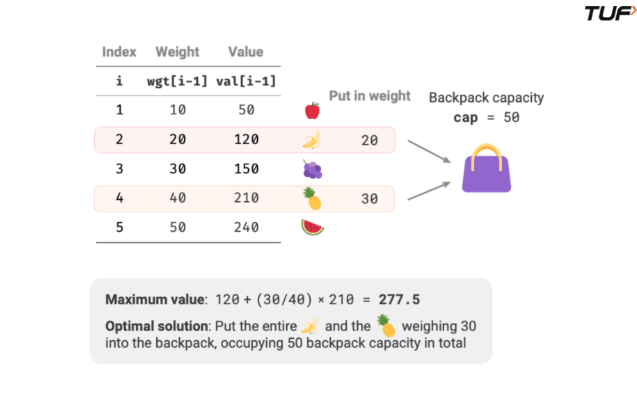

## Optimal Python Solution

In [3]:
# Class to represent an item with value and weight
class Item:
    def __init__(self, value, weight):
        self.value = value
        self.weight = weight

# Function to calculate the maximum value we can get with fractional knapsack
def fractionalKnapsack(W, arr, n):

    # Sort items based on the value/weight ratio in descending order
    arr.sort(key=lambda x: (x.value / x.weight), reverse=True)

    curWeight = 0  # Current weight of knapsack
    finalvalue = 0.0  # Final value we can achieve

    # Iterate through the sorted items
    for i in range(n):

        # If the current item can be fully added to the knapsack
        if curWeight + arr[i].weight <= W:
            curWeight += arr[i].weight
            finalvalue += arr[i].value  # Add the full value of the item
        else:
            # If the current item can't be fully added, take the fractional part
            remain = W - curWeight
            finalvalue += (arr[i].value / arr[i].weight) * remain
            break  # Break as we have filled the knapsack

    return finalvalue  # Return the maximum value that can be carried

In [4]:
# Main function
def main():
    # Input data
    n = 3
    weight = 50  # Capacity of knapsack
    arr = [Item(100, 20), Item(60, 10), Item(120, 30)]

    # Calculate the maximum value we can get with the fractional knapsack
    ans = fractionalKnapsack(weight, arr, n)

    # Output the result
    print(f"The maximum value is: {ans:.2f}")

# Call the main function
if __name__ == "__main__":
    main()

The maximum value is: 240.00


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(n log n + n). O(n log n) Time Complexity is to sort the items and O(n) is to iterate through all the items for calculating the answer.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional data structure has been used.
```

# 3. Greedy Algorithm to Find Minimum Number of Coins :

## Problem Statement :

Given an integer array of coins representing coins of different denominations and an integer amount representing a total amount of money. <b> Return the fewest number of coins that are needed to make up that amount.</b> If that amount of money cannot be made up by any combination of the coins, return -1. There are infinite numbers of coins of each type.


### Examples :

**Example 1:**
```
Input: coins = [1, 2, 5], amount = 11
Output: 3

Explanation: 11 = 5 + 5 + 1. We need 3 coins to make up the amount of 11.
```

**Example 2:**
```
Input: coins = [2, 5], amount = 3
Output: -1

Explanation: It's not possible to make amount 3 with coins 2 and 5. Since we can't combine the coin 2 and 5 to make the amount 3, the output is -1.
```

```
Constraints:
n = number of distinct denominations
1 <= n <= 100
1 <= coins[i], amount <= 10^3
```

## FAQs & Interview Follow-ups :

**Why do we initialize dp[i] = ∞?**
```
We start with an impossible state (∞) to ensure that min(dp[i], dp[i - coin] + 1) correctly selects the smallest number of coins.
```

**Why do we iterate over coins first instead of amount?**
```
Iterating over coins first ensures that each amount is updated optimally, allowing each coin to contribute to smaller values before reaching larger ones.
```

**How would you modify the problem if you needed the total number of ways to make amount instead of the minimum coins?**
```
Change dp[i] = min(dp[i], dp[i - coin] + 1) to summation: dp[i] += dp[i−coin].
```

**Can this problem be solved efficiently using graph-based techniques?**
```
Yes! Model the problem as a graph where each node is an amount and edges represent valid coin choices. A BFS (shortest path) approach finds the Minimum Steps.
```

# 4. Lemonade Change :

## Problem Statement :

Each Lemonade at a booth sells for 5 USD. Consumers are lining up to place individual orders, following the billing order. Every consumer will purchase a single lemonade and may pay with a 5 USD, 10 USD, or 20 USD bill. Each customer must receive the appropriate change so that the net transaction is 5 USD. Initially, there is no change available.

Determine if it is possible to provide the correct change to every customer. Return true if the correct change can be given to every customer, and false otherwise.

Given an integer array bills, where bills[i] is the bill the ith customer pays, return true if the correct change can be given to every customer, and false otherwise.


### Examples :

**Example 1:**
```
Input : bills = [5, 5, 10, 5, 20]
Output : true

Explanation :
Initially we have $0 available for change.
From first 2 customers, we will collect two $5 bills in order. After the first 2 customers we have two $5 bills available with us for change.
From the third customer , we collect bill of $10 and give back $5. After third customer we have one $5 and one $10 bill available with us for change.
From fourth customer , we collect $5 bill. After fourth customer we have two $5 and one $10 bills available with us for change if required.
From fifth customer , we collect bill of $20 and give back $15 (one $10 + one $5 bill).

Since all the customers did receive the change correctly, hence we return true.
```

**Example 2:**
```
Input : bills = [5, 5, 10, 10, 20]
Output : false

Explanation :
From first 2 customers, we will collect two $5 bills in order. After the first two customers we have two $5 bills available with us for change.
From third customer, we collect $10 and give back $5. After the third customer we have one $5 and one $10 bill available with us for change.
From fourth customer, we collect $10 and give back $5. After the fourth customer we have two $10 bill available with us for change.
From fifth customer, we collect $20, we cannot give the $15 change as we have two $10 bills.

Since all the customers did not receive the change correctly , the we return false.
```

```
Constraints:
1 <= bills.length <= 10^5
bills[i] = {5 , 10 , 20}
```

# Optimal Solution

## Intuition

If a customer pays with a 5 USD bill, it's easy because we don't need to give any change. When a customer pays with a 10 USD bill, we need to have a 5 USD bill on hand to give them the correct change.
Now, if someone pays with a 20 USD bill, we can give them change with one 10 USD bill and one 5 USD bill, or if we don't have a 10 USD bill, we need to have three 5 USD bills to make the change.

## Approach

* First, keep track of the number of 5 USD and 10 USD bills available. Start with zero bills. As each customer pays, follow these steps:
* If a customer pays with a 5 USD bill, simply keep it because no change is needed.
* If a customer pays with a 10 USD bill, provide them with 5 USD in change. Ensure there is at least one 5 USD bill to do this. If there is, give the 5 USD bill and keep the 10 USD bill. If not, it is impossible to give the correct change, and the process should stop.
* If a customer pays with a 20 USD bill, provide them with 15 USD in change. The preferred way is by giving one 10 USD bill and one 5 USD bill. If there is no 10 USD bill, give three 5 USD bills instead. If neither option is possible, providing the correct change is not feasible, and the process should stop.
* If the correct change is given to all customers, the process is successful. If at any point providing the correct change is not possible, the process fails.

## Dry Run

### When all the customers can be served

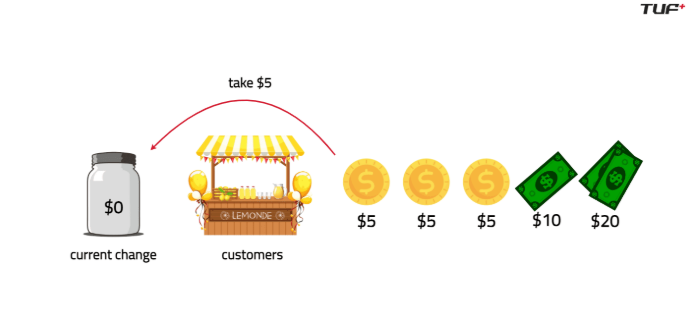
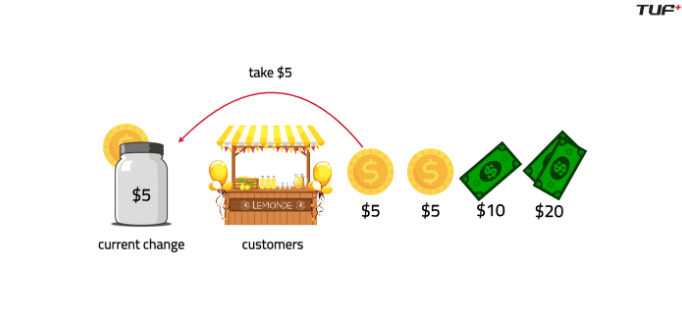
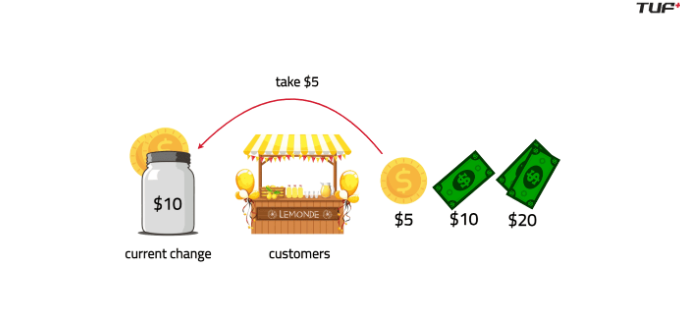
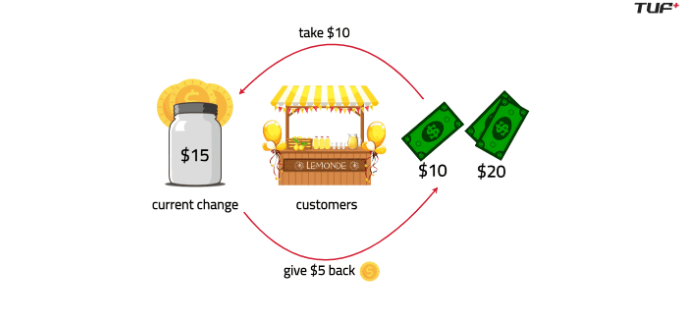
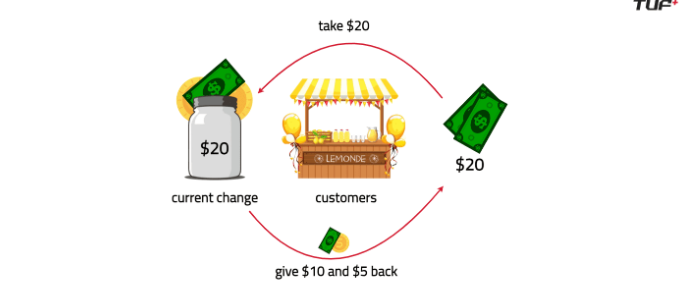
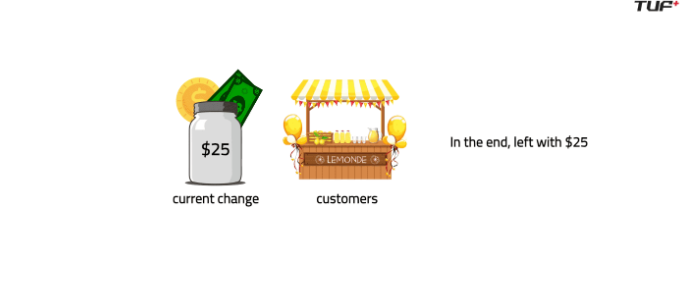

### When all the customers cannot be served

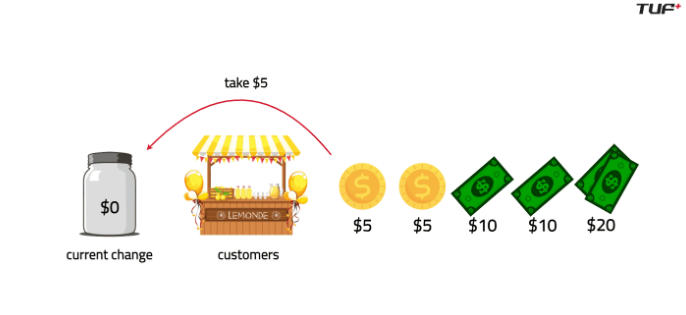
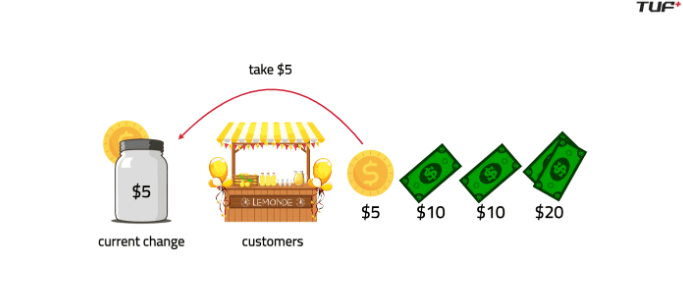
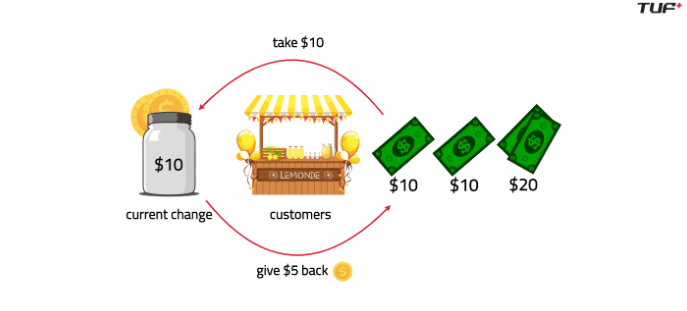
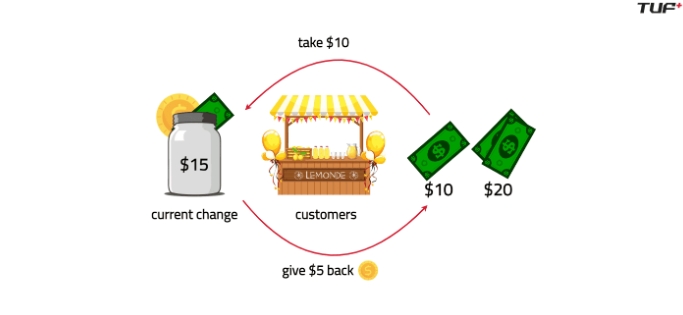
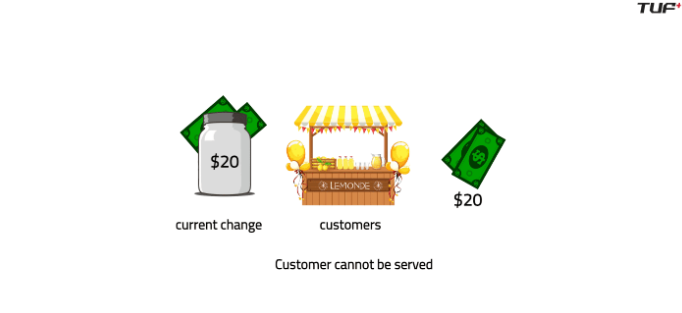

## Optimal Python Solution

In [5]:
class Solution:
    """ Function to find whether each customer can 
    be provided with correct change """
    def lemonadeChange(self, bills):
        
        # Counter for $5
        five = 0 
        
        # Counter for $10
        ten = 0   
        
        # Iterate through each customer's bill
        for bill in bills:
            
            # If the customer's bill is $5
            if bill == 5:
                # Increment $5
                five += 1
            
            # If the customer's bill is $10
            elif bill == 10:
                # Check if there are $5 bills available to give change
                if five > 0:
                    # Use one $5
                    five -= 1
                    # Receive one $10
                    ten += 1
                else:
                    # If no $5 bill available, return false
                    return False
            
            # If the customer's bill is $20
            else:
                # Check if there are both $5 and $10 bills available to give change
                if five > 0 and ten > 0:
                    # Use one $5
                    five -= 1
                    # Use one $10
                    ten -= 1
                # If there are not enough $10 bills,
                # check if there are at least three $5 bills available
                elif five >= 3:
                    # Use three $5 bills
                    five -= 3
                else:
                    # If unable to give change, return false
                    return False
        
        # Return true
        return True

In [6]:
# Example usage
if __name__ == "__main__":
    bills = [5, 5, 5, 10, 20]
    print("Queues of customers: ", end="")
    for bill in bills:
        print(bill, end=" ")
    print()
    solution = Solution()
    ans = solution.lemonadeChange(bills)
    if ans:
        print("It is possible to provide change for all customers.")
    else:
        print("It is not possible to provide change for all customers.")

Queues of customers: 5 5 5 10 20 
It is possible to provide change for all customers.


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N) where N is the number of people in the queue or the number of bills to be processed. Each customer's bill is processed exactly once. The loop iterates N times, and the operations performed during each iteration are done in constant time.
```

**Space Complexity:**
```
The Space Complexity will be O(1) because no extra space is used.
```

## FAQs & Interview Follow-ups :

**What if there are no 5 USD bills in the array?**
```
If there are no $5 bills and a customer pays with a $10 or $20 bill, return false immediately since change cannot be provided.
```

**What if there are multiple 20 USD bills in a row?**
```
The algorithm handles each transaction independently. If enough $10 and $5 bills are available for each $20 transaction, it proceeds. Otherwise, it terminates when change can't be given.
```

**What happens if customers are allowed to pay with other denominations (e.g., 2 USD, 50 USD)?**
```
Extend the tracking system to handle these denominations and implement rules to prioritize their usage for making change.
```

**How would you modify the solution if the booth starts with some initial change?**
```
Add the initial counts of $5 and $10 bills to the respective variables at the beginning of the simulation.
```

# 5. Valid Paranthesis Checker :

## Problem Statement :

Find the validity of an input string s that only contains the letters '(', ')' and '*'.

A string entered is legitimate if :

* Any left parenthesis '(' must have a corresponding right parenthesis ')'.
* Any right parenthesis ')' must have a corresponding left parenthesis '('.
* Left parenthesis '(' must go before the corresponding right parenthesis ')'.
* '*' could be treated as a single right parenthesis ')' or a single left parenthesis '(' or an empty string "".


### Examples :

**Example 1:**
```
Input : s = (*))
Output : true

Explanation : The * can be replaced by an opening '(' bracket. The string after replacing the * mark is "(())" and is a valid string.
```

**Example 2:**
```
Input : s = *(()
Output : false

Explanation : The * replaced with any bracket does not form a valid string.
```

```
Constraints:
1 <= s.length <= 10^4
s consists of only '(', ')', '*'.
```

## FAQs & Interview Follow-ups :

**How does low and high handle the flexibility of '*'?**
```
low assumes the * acts as a right parenthesis ) or empty string "", minimizing unmatched left parentheses. high assumes the * acts as a left parenthesis (, maximizing unmatched left parentheses. Together, they ensure all possible interpretations of * are covered.
```

**What if the string contains no ( or )?**
```
If the string contains only *, it is always valid since all * can be treated as empty strings.
```

**What if * had additional roles or constraints?**
```
Modify the logic to handle new constraints. For example, if * could represent multiple parentheses, you might need a more complex simulation or stack-based approach.
```

**How does this approach compare to using a stack?**
```
A stack-based approach keeps track of potential matches directly but is less space-efficient (O(n)). The 2-counter method is more efficient (O(1) space) and simpler for this problem.
```

# 6. N Meetings in one Room :

## Problem Statement :

Given one meeting room and N meetings represented by 2 arrays, start and end, where start[i] represents the start time of the ith meeting and end[i] represents the end time of the ith meeting, <b> determine the maximum number of meetings that can be accommodated in the meeting room if only one meeting can be held at a time.</b>


### Examples :

**Example 1:**
```
Input : Start = [1, 3, 0, 5, 8, 5] , End = [2, 4, 6, 7, 9, 9]
Output : 4

Explanation : The meetings that can be accommodated in meeting room are (1,2), (3,4), (5,7), (8,9).
```

**Example 2:**
```
Input : Start = [10, 12, 20] , End = [20, 25, 30]
Output : 1

Explanation : Given the start and end time, only one meeting can be held in the meeting room.
```

```
Constraints:
1 <= N <= 10^5
0 <= start[i] < end[i] <= 10^5
```

# Optimal Solution

## Intuition

<b> If there are 2 meetings, one that finishes early and another that finishes later, it is better to choose the meeting that finishes early. Choosing a meeting that ends earlier frees up the room sooner, allowing more meetings to be accommodated afterwards.</b> By prioritizing meetings that end early, the meeting room is utilized more efficiently, maximizing the total number of meetings that can be held.

## Approach

* Use a vector to store pairs of start and end times of the meetings. This helps in easily accessing and sorting the meeting times.
* Sort the meetings based on their end times in ascending order. This ensures that the meetings which finish earliest are considered first.
* Create a variable to keep track of the end time of the last selected meeting. Also, initialize a counter to count the number of meetings that can be accommodated. Loop through the sorted meetings and for each meeting:
* Check if the start time of the current meeting is greater than the end time of the last selected meeting.
* If true, select the current meeting, update the end time to the end time of the current meeting, and increment the counter.
* After iterating through all meetings, the counter will contain the maximum number of non-overlapping meetings that can be accommodated.

## Dry Run

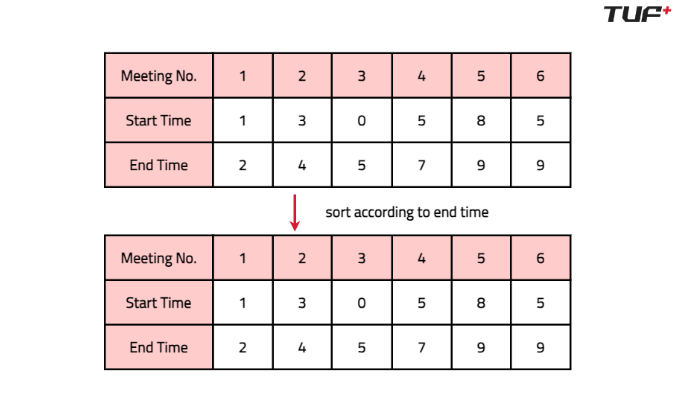
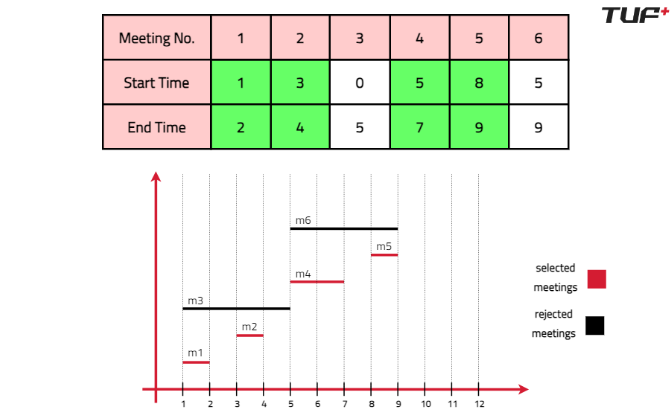

## Optimal Python Solution

In [7]:
class Solution:
    # Function to find the maximum number of meetings that can be held
    def maxMeetings(self, start, end):
        n = len(start)
        # List to store meetings
        meetings = []
        
        # Fill the meetings list with start and end times
        for i in range(n):
            meetings.append((start[i], end[i]))

        # Sort the meetings based on end times in ascending order
        meetings.sort(key=lambda x: x[1])

        # The end time of last selected meeting
        limit = meetings[0][1]
        # Initialize count
        count = 1

        # Iterate through the meetings to select the maximum number of non-overlapping meetings
        for i in range(1, n):
            # If the current meeting starts after the last selected meeting ends
            if meetings[i][0] > limit:
                # Update the limit to the end time of the current meeting
                limit = meetings[i][1]
                # Increment count
                count += 1

        # Return count
        return count

In [8]:
# Example usage
if __name__ == "__main__":
    obj = Solution()
    
    # Start and end times of the meetings
    start = [1, 3, 0, 5, 8, 5]
    end = [2, 4, 6, 7, 9, 9]
    
    # Get the maximum number of meetings that can be held
    maxMeetings = obj.maxMeetings(start, end)
    
    # Output the maximum number of meetings
    print("Maximum number of meetings:", maxMeetings)

Maximum number of meetings: 4


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N+N logN) where 𝑁 is the size of the start and end arrays.

The O(N) term accounts for filling the meetings array with start and end times. The O(NlogN) term arises from sorting the meetings based on their end times. After sorting, the function iterates through the sorted meetings in O(N) time to count the maximum number of non-overlapping meetings.
```

**Space Complexity:**
```
The Space Complexity will be O(N) since we used an additional data structure for storing the start time and end time.
```

## FAQs & Interview Follow-ups :

**Why sort by end time?**
```
Sorting by end time ensures that meetings that finish earlier are prioritized. This allows more meetings to be accommodated since the room is freed up sooner.
```

**What if all meetings overlap?**
```
If all meetings overlap, only one meeting (the one with the earliest end time) can be scheduled.
```

**What if there are multiple meeting rooms?**
```
If multiple rooms are available, the problem becomes a meeting room allocation problem, which can be solved using a min-heap to track the end times of ongoing meetings.
```

**What is the difference between this and the interval scheduling maximization problem?**
```
This is a specific case of interval scheduling maximization, where the goal is to select the maximum number of non-overlapping intervals from a set of intervals.
```

# 7. Jump Game :

## Problem Statement :

Given an array of integers nums, each element in the array represents the Maximum Jump Length at that position. <b> Initially starting at the first index of the array, determine if it is possible to reach the last index.</b> Return true if the last index can be reached, otherwise return false.

### Examples :

**Example 1:**
```
Input : [2, 3, 1, 1, 4]
Output : true

Explanation : We can simply take Jump of 1 step at each index to reach the last index.
```

**Example 2:**
```
Input : [3, 2, 1, 0, 4]
Output : false

Explanation : No matter how you make jumps you will always reach the third index (0 base) of the array.
The Maximum Jump of index three is 0, and hence you can never reach the last index of array.
```

```
Constraints:
1 <= nums.length <= 10^4
0 <= nums[i] <= 10^5
```

# Optimal Solution

## Intuition

Keep track of the farthest position that can be reached at any point. <b> If at an index where it's impossible to move to the next one because it's too far away, then it's impossible to get to the end, and the process must stop. </b> Otherwise, continue updating the farthest reachable index while moving forward. If the traversal manages to reach or pass the last index, then reaching the end is possible.

## Approach

* Start by setting a pointer to track the farthest point that can be reached from the beginning of the array.
* Iterate through each position in the array, checking if the current position exceeds the farthest point reached so far.
* If the current position is beyond the reachable point, it indicates that further progress is not possible, and reaching the end is infeasible.
* If the current position is within the reachable point, update the pointer to reflect the farthest position that can be reached from the current spot.
* If the entire array is traversed without finding an unreachable position, it confirms that the last index is reachable, thus making it possible to reach the end.

## Dry Run

### Possible to Reach

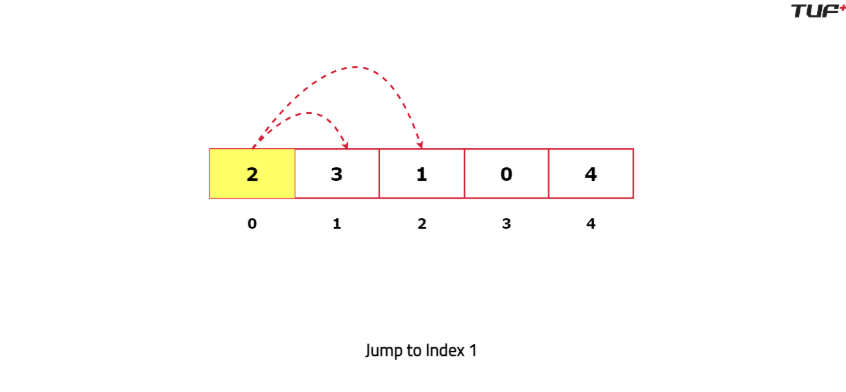
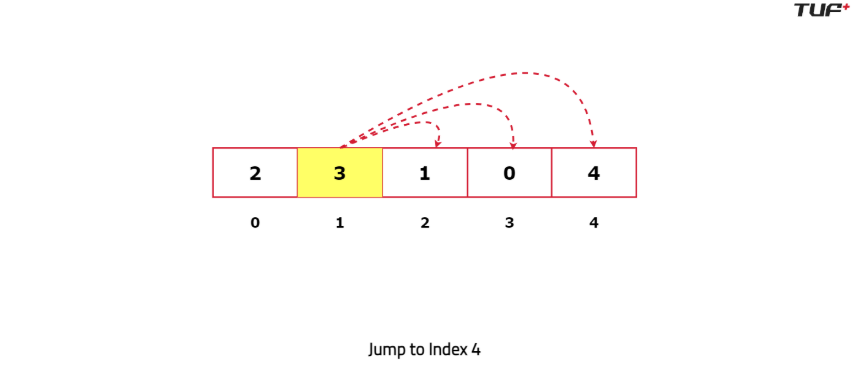

### Not Possible to Reach

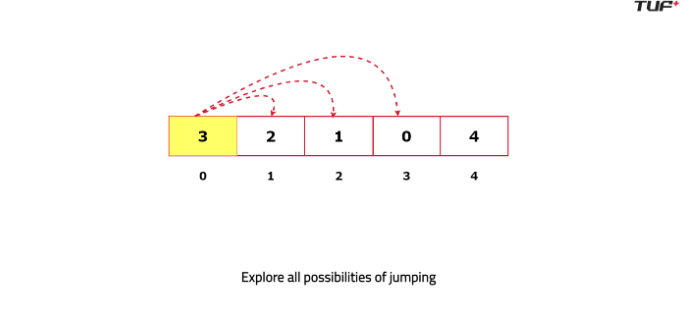
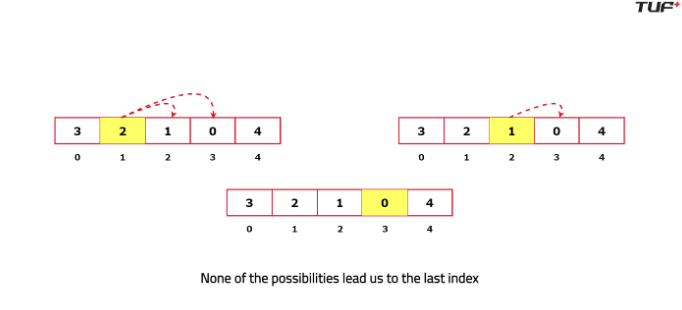

## Optimal Python Solution

In [9]:
class Solution:
    # To determine if last index is reachable
    def canJump(self, nums):
        # Initialize maximum index
        max_index = 0

        # Iterate through each index of the array
        for i in range(len(nums)):
            # If the current index is greater than the 
            # maximum reachable index it means we cannot move 
            # forward and should return false
            if i > max_index:
                return False

            # Update the maximum index that can be 
            # reached by comparing the current maxIndex with the sum 
            # of the current index and the maximum jump from that index
            max_index = max(max_index, i + nums[i])

        # If we complete the loop, it means we can reach the last index
        return True

In [10]:
# Example usage
if __name__ == "__main__":
    nums = [4, 3, 7, 1, 2]

    print("Array representing maximum jump from each index: ", end="")
    for num in nums:
        print(num, end=" ")
    print()

    solution = Solution()
    ans = solution.canJump(nums)

    if ans:
        print("It is possible to reach the last index.")
    else:
        print("It is not possible to reach the last index.")

Array representing maximum jump from each index: 4 3 7 1 2 
It is possible to reach the last index.


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N) where N is the length of the array. We iterate through the input array exactly once and at each element perform constant time operations.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

## FAQs & Interview Follow-ups :

**What happens if the array contains very large jump lengths?**
```
Large jump lengths don’t impact the algorithm because it only cares about the maximum reachable index at each step, and not the specific jump sizes.
```

**What if the array contains negative or non-integer values?**
```
The problem assumes the array contains only non-negative integers. Negative or non-integer values would require additional validation and adjustments to the logic.
```

**What if you need to find the Minimum Number of Jumps to reach the last index?**
```
Extend the Greedy approach by tracking the end of the current jump range and counting the number of jumps. Increment the jump count whenever the current index exceeds the range of the current jump.
```

**What if you want to return the indices of the path taken?**
```
Modify the Greedy Solution to store the path by keeping track of the index from which each jump was made. Backtrack from the last index to reconstruct the path.
```

# 8. Jump Game 2 :

## Problem Statement :

You are given a 0-indexed array nums of length n representing your Maximum Jump Capability from each index.

<b> You start at index 0. Each element nums[i] represents the maximum number of steps you can jump forward from index i. Your goal is to reach the last index of the array (nums[n - 1]) using the Minimum Number of Jumps.</b>

Return the Minimum Number of Jumps required to reach the last index. You can assume that it is always possible to reach the last index.


### Examples :

**Example 1:**
```
Input: nums = [2,3,1,1,4]
Output: 2

Explanation:
Jump from index 0 → 1 → 4 (2 jumps).
```

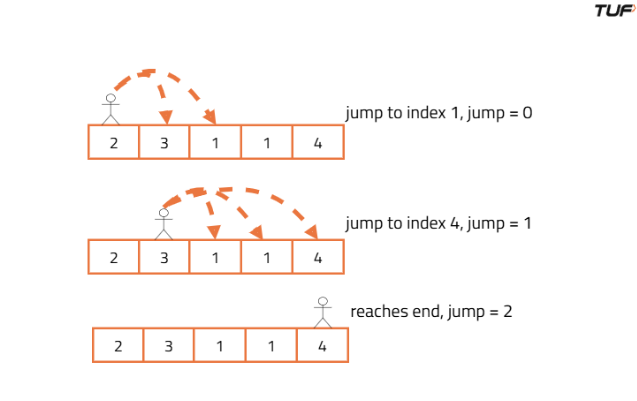

**Example 2:**
```
Input: nums = [2,3,0,1,4]
Output: 2

Explanation:
Jump from index 0 → 1 → 4.
```

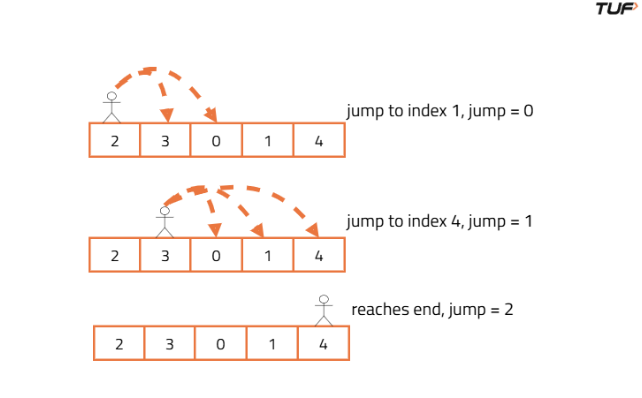

```
Constraints:
1 <= nums.length <= 10⁴
0 <= nums[i] <= 1000
It is guaranteed that you can reach the last index.
```

# Brute Force Solution

## Intuition

The Brute Force idea is to try every possible jump from each index. From the starting position, we explore all jumps within the allowed range nums[i]. For each position we land on, we again try all possible jumps from there. This process continues until we either reach the end or exhaust all paths. We recursively calculate the minimum number of jumps needed to reach the end from each index. Since we're trying all combinations, it's not efficient but ensures we check every possible path.

## Approach

* Define a Recursive Function that takes the current index as input.
* If the current index is at or beyond the last index, return 0 (we’re already at the end).
* Initialize a variable to store the Minimum Number of Jumps (e.g., minJumps = INF).
* Loop through all possible jumps from current index (from 1 to nums[i]).
* For each jump, call the recursive function for the new index (i + jump).
* Update minJumps with the minimum of its current value and 1 + result of recursive call.
* After exploring all paths, return minJumps.

## Dry Run

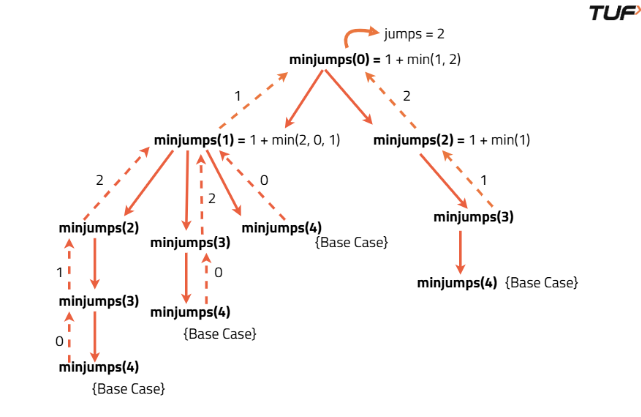

## Brute Force Python Solution

In [11]:
class Solution:
    # Function to find the minimum number of jumps using recursion
    def jump(self, nums):
        return self.min_jumps(nums, 0)

    def min_jumps(self, nums, position):
        # If current position is at or beyond the last index, return 0
        if position >= len(nums) - 1:
            return 0

        # If jump length is 0, we are stuck
        if nums[position] == 0:
            return float('inf')

        min_step = float('inf')

        # Try every possible jump from this position
        for jump in range(1, nums[position] + 1):
            sub_result = self.min_jumps(nums, position + jump)
            if sub_result != float('inf'):
                min_step = min(min_step, 1 + sub_result)

        return min_step

In [12]:
# Driver code
if __name__ == "__main__":
    nums = [2, 3, 1, 1, 4]
    sol = Solution()
    print("Minimum number of jumps:", sol.jump(nums))

Minimum number of jumps: 2


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(2^N), where N is the number of elements in the array. This is because, from each index, the function recursively explores all possible jump lengths, leading to an exponential number of recursive calls.
```

**Space Complexity:**
```
The Space Complexity will be O(N), due to the Maximum Depth of the Recursion Stack in the worst case. No extra data structures are used except the recursive call stack.
```

# Better Solution

## Intuition

We use Dynamic Programming to track the Minimum Number of Jumps needed to reach each index. We initialize a dp array where each dp[i] holds the Minimum Jumps required to reach index i. Set dp[0] = 0 (starting point), and all other entries as infinity. For every index, explore how far you can jump and update the dp value for each reachable position. The value at dp[n - 1] will be our answer.

## Approach

* Initialize a list of size equal to the input array length with very large values.
* Set the first index value to 0 since no jumps are needed at the start.
* Iterate through the array from start to end.
* From each index, check how far you can jump based on the value at that index.
* For each reachable index from the current position, update it with the minimum jumps required.
* Return the value at the last index of the list, which represents the minimum jumps needed to reach the end.

## Dry Run

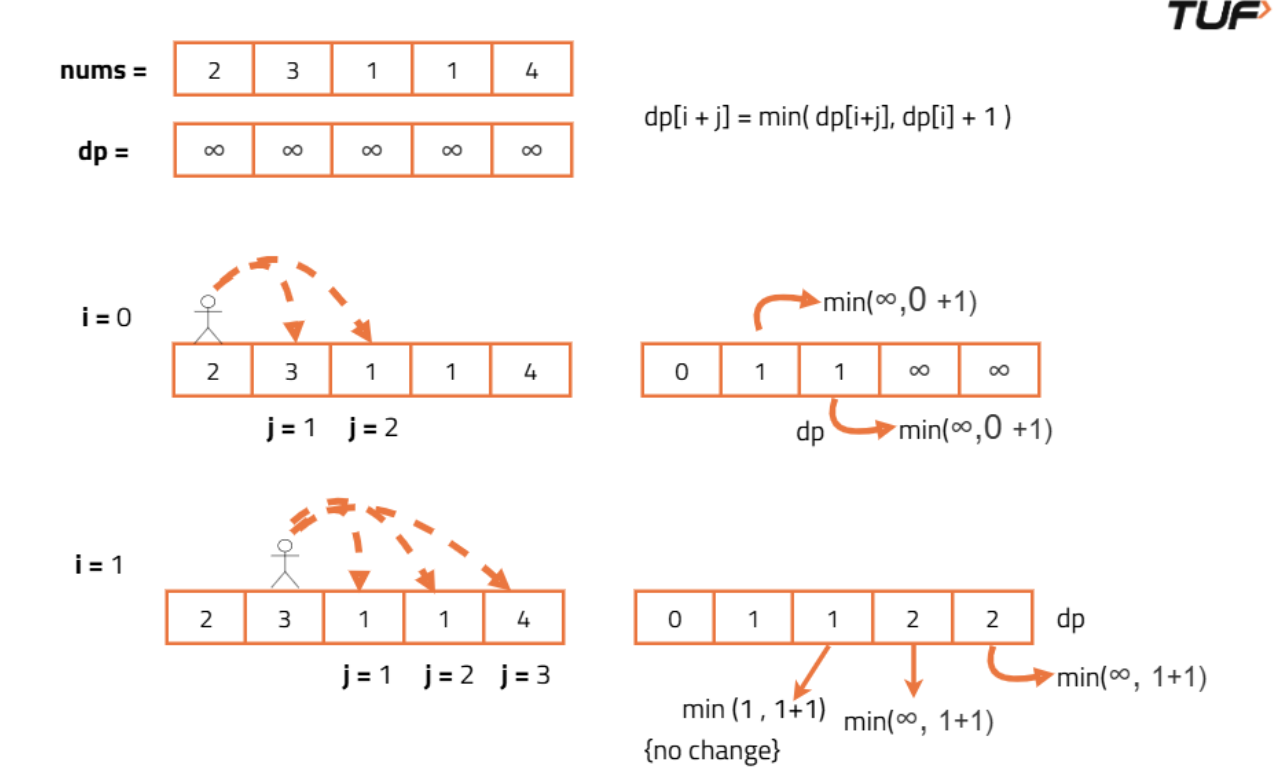
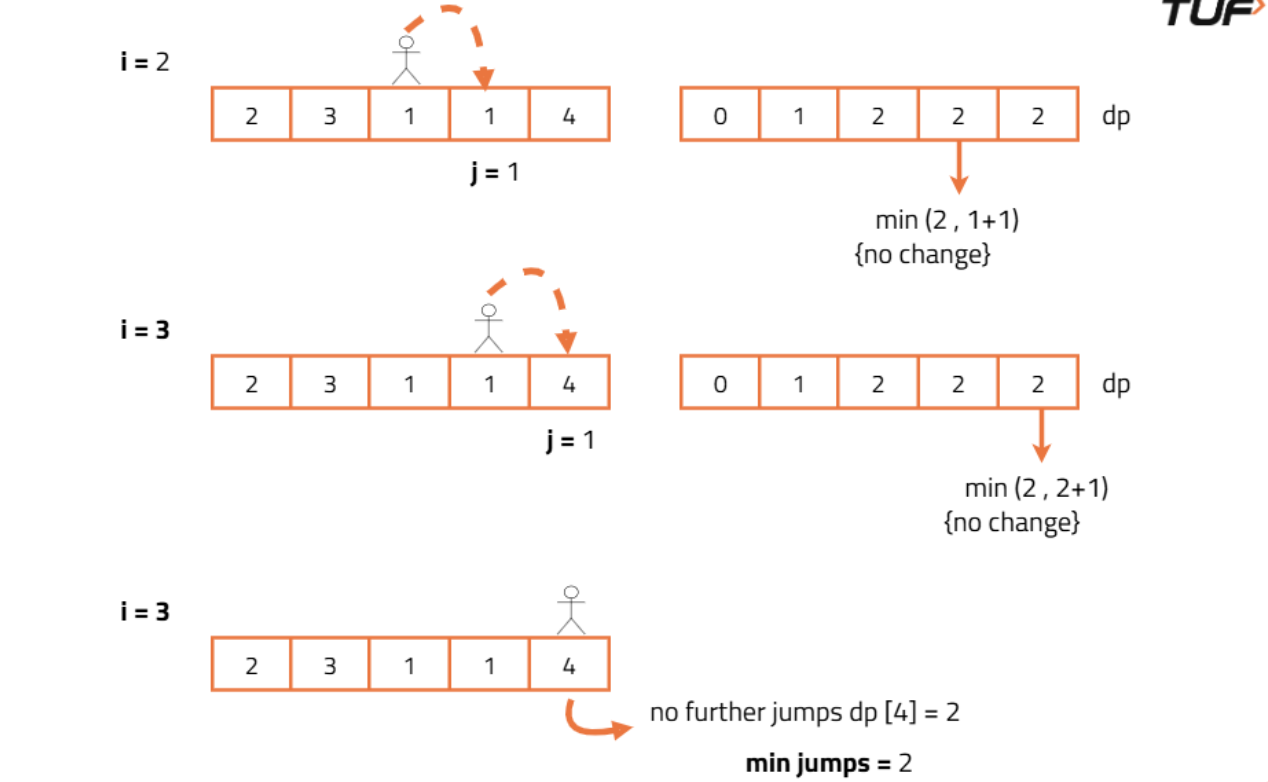

## Better Python Solution

In [14]:
class Solution:
    # Function to compute the minimum number of jumps to reach the last index
    def jump(self, nums):
        # Length of input array
        n = len(nums)

        # Initialize DP array with infinity
        dp = [float('inf')] * n

        # It takes 0 jumps to reach the starting index
        dp[0] = 0

        # Traverse the array
        for i in range(n):
            for j in range(1, nums[i] + 1):
                if i + j < n:
                    # Update dp[jump position] with min jumps
                    dp[i + j] = min(dp[i + j], dp[i] + 1)

        # Return min jumps to reach end
        return dp[n - 1]

In [15]:
# Driver code
sol = Solution()
nums = [2, 3, 1, 1, 4]
print("Minimum jumps:", sol.jump(nums))

Minimum jumps: 2


## Complexity Analysis

**Time Complexity:**

The Time Complexity will be O($N^2$). This is because we use 2 nested loops where the outer loop runs for N elements and inner can go up to N in worst case.

**Space Complexity:**

The Space Complexity will be O(N). This is because we use an extra DP array of size N to store the Minimum Jumps to reach each index.